Welcome to the first handson!!!
- In this handson you will be building an optimized network for binary classification.
- You will learn how to incorporate regularization and dropout techniques in order to generalize the model's prediction.
- Follow the instruction provided for cell to write the code in each cell.

- The data is provided as file named 'blobs.csv'.
- The data has two features feature1 and feature2 and one targer variable which is a binary value
- Using pandas read the csv file and assign the resulting dataframe to variable 'df'   
- for example if file name is 'xyz.csv' read file as **pd.read_csv('xyz.csv')**
- Packages to import: **pandas** (to read csv file)

In [22]:
###Sart code              
import pandas as pd              #import pandas 
df = pd.read_csv('blobs.csv')         #create a dataframe named 'data' from 'blobs.csv' file
###End code
print(df.head())

   feature1  feature2  target
0  1.459110 -0.387450     1.0
1 -0.982582  0.431602     0.0
2  1.059435 -0.036946     0.0
3  0.314481  0.811808     0.0
4  1.017578  0.286717     0.0


- Extract feature1 and feature2 values from dataframe 'df' and assign it to variable 'X'
- Extract target variable 'traget' and assign it to variable 'y'.  
Hint:
 - Use .values to exract values from dataframe

In [23]:
###Start code
X = df[['feature1','feature2']].values                                    #extract feature1 and feature2 values
y = df['target'].values   #extract target values
###End code
assert X.shape == (5000, 2)
assert y.shape == (5000, )

- Run the below cell to visualize the data in x-y plane. (visualization code has been written for you)
- The blue spots corresponds to target value 0 and green spots corresponds to target value 1

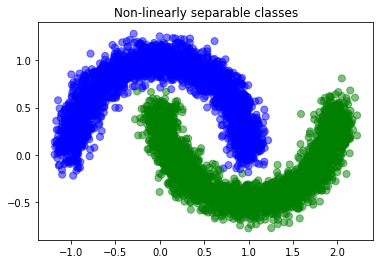

In [24]:
import matplotlib.pyplot as plt
import matplotlib.colors
colors=['blue','green']
cmap = matplotlib.colors.ListedColormap(colors)
#Plot the figure
plt.figure()
plt.title('Non-linearly separable classes')
plt.scatter(X[:,0], X[:,1], c=y,
           marker= 'o', s=50,cmap=cmap,alpha = 0.5 )
plt.show()

- In order to feed the network the input has to be of **shape (number of features, number of samples)** and target should be of shape **(1, number of samples)**
- Transpose X and assign it to variable 'X_data'
- reshape y to have shape (1, number of samples) and assign to variable 'y_data'

In [25]:
###Start code
X_data = X.T
y_data = y.reshape(1,len(y))
###End code

assert X_data.shape == (2, 5000)
assert y_data.shape == (1, 5000)

Define the network dimension to have two input features, two hidden layers with 25 nodes each, one output node at final layer. 

In [26]:
layer_dims = [2,25,25,1]

import tensorflow package as tf

In [27]:
import tensorflow as tf                          #import tensorflow

Define a function named placeholders to return two placeholders one for input data as A_0 and one for output data as Y.
- Set the datatype of placeholders as float64
- parameters - num_features
- Returns - A_0 with shape (num_feature, None) and Y with shape(1,None)

In [28]:
def placeholders(num_features):
    A_0 = tf.placeholder(dtype=tf.float64, shape=[num_features,None])
    Y = tf.placeholder(dtype=tf.float64, shape=[1,None])
    return A_0,Y

Define function named initialize_parameters_deep() to initialize weights and bias for each layer
- Use tf.get_variable to initialise weights and bias, set datatype as float64
- Make sure you are using xavier initialization for weigths and initialize bias to zeros
- Parameters - layer_dims
- Returns - dictionary of weights and bias

In [29]:
def initialize_parameters_deep(layer_dims):
    tf.set_random_seed(1)
    L = len(layer_dims)
    parameters = {}
    for l in range(1,L):
        parameters['W' + str(l)] = tf.get_variable('W'+str(l), shape=[layer_dims[l],layer_dims[l-1]],initializer=tf.contrib.layers.xavier_initializer(),dtype=tf.float64 )
                                   
        parameters['b' + str(l)] = tf.get_variable('b'+str(l), shape=[layer_dims[l], 1], dtype=tf.float64, initializer=tf.zeros_initializer())
    
    return parameters

Define functon named linear_forward_prop() to define forward propagation for a given layer.
- parameters: A_prev(output from previous layer), W(weigth matrix of current layer), b(bias vector for current layer),activation(type of activation to be used for out of current layer)  
- returns: A(output from the current layer)
- Use relu activation for hidden layers and for final output layer return the output unactivated i.e if activation is sigmoid

In [30]:
def linear_forward_prop(A_prev,W,b, activation):
    ###Start code
    Z = tf.add(tf.matmul(W,A_prev),b)
    if activation == "sigmoid":
        A =  Z
    elif activation == "relu":
        A =tf.nn.relu(Z)
    ###End code
    return A

Define forward propagation for entire network as l_layer_forward()
- Parameters: A_0(input data), parameters(dictionary of weights and bias), dropout (boolean)
- returns: A(output from final layer)  
If dropout = True, deactivate the layers's output with probability value equal to 0.8.  
use tensoflow's droupout function to apply dropout.

In [31]:
def l_layer_forwardProp(A_0, parameters, drop_out = False):
    A = A_0
    L = len(parameters)//2                               #number of layers
    for l in range(1,L):
        A_prev = A
        ###Start code
        A =  linear_forward_prop(A_prev, parameters['W' + str(l)], parameters['b' + str(l)], "relu" )  #call linear_forward_prop to return the output from current layer
        ###End code
        if drop_out:                                    #check if dropout == True, if true apply dropout to current layer's output.
            A = tf.nn.dropout(x=A,keep_prob=0.8)  # call tensoflow's droupout function to deactivate output A, set keep_prob = 0.8
    A = linear_forward_prop(A, parameters['W' + str(L)], parameters['b' + str(L)], "sigmoid" )   # return output from final layer.
    return A

- Define the cost function
- parameters:
  - Z_final: output fro final layer
  - Y: actual output
  - parameters: dictionary of weigths and bias
  - regularization : boolean
  - lambd: regularization parameter
- First define the original cost using tensoflow's sigmoid_cross_entropy function
- If **regularization == True** add regularization term to original cost function

In [32]:
def final_cost(Z_final, Y, parameters, regularization=False, lambd=0):
    # define original cost
    cost = tf.nn.sigmoid_cross_entropy_with_logits(logits=Z_final, labels=Y)
    if regularization:
        # initialize regularization term to zero
        reg_term = 0
        L = len(parameters) // 2
        for l in range(1, L+1):
            # use tensorflow's l2 regularization to calculate regularization term for each later and
            # sum it up to previous layer's regularization term

            ###Start code
            reg_term += tf.nn.l2_loss(parameters['W' + str(l)])

        # multiply lambd/2 to reg_term to add it to original cost
        cost += reg_term*(lambd/2)
        ##End code
    return tf.reduce_mean(cost)

- define the model to train the network
- parameters:
  - X_train, Y_train: input and target data
  - layer_dims: network configuration
  - learning_rate
  - num_iter: number of epoches
  - regularization (boolean): If true apply regularization
  - lambd: regularization parameter ($\lambda$)
  - dropout (boolean): if true apply dropout
- return: dictionary of trained parameters

In [33]:

def deep_net(X_train, Y_train, layer_dims, learning_rate, num_iter, regularization=False, lambd=0, drop_out=False):
    tf.reset_default_graph()
    num_features = layer_dims[0]
    ###Start code
    A_0, Y = placeholders(num_features)  # call placeholder function to initialize placeholders A_0 and Y
    parameters = initialize_parameters_deep(layer_dims)  # Initialse Weights and bias using initialize_parameters_deep() with layer_dims as parameters
    Z_final = l_layer_forwardProp(A_0, parameters,drop_out)  # call the function l_layer_forwardProp() to define the final output

    # call final_cost() function to return the cost that has to be minimized during gradient descent
    cost = final_cost(Z_final, Y, parameters, regularization, lambd)

    # call tensorflow's gradient descent optimizer function with minimize cost
    train_net = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)
    # End code
    init = tf.global_variables_initializer()
    costs = []
    with tf.Session() as sess:
        sess.run(init)
        for i in range(num_iter):
            _, c = sess.run([train_net, cost], feed_dict={A_0: X_train, Y: Y_train})
            if i % 100 == 0:
                costs.append(c)
            if i % 1000 == 0:
                print(c)
        with open('output.txt', 'w') as file:
            file.write("cost = %f " % costs[-1])
        plt.ylim(min(costs) + 0.1, max(costs), 4, 0.01)
        plt.xlabel("epoches per 100")
        plt.ylabel("cost")
        plt.plot(costs)
        plt.show()
        params = sess.run(parameters)
    return params


Run the cell below to define the method to predict outputof the model for given input and parameters.The code has been written for you
Note that we are not applying droupout during prediction.

In [34]:
def predict(A_0, parameters):
    with tf.Session() as sess:
        Z = l_layer_forwardProp(A_0, parameters, drop_out= False)
        A = sess.run(tf.round(tf.sigmoid(Z)))
    return A

- Run the below cell to define the method to plot the decision boundary.The code for visualization has been written for you.

In [35]:
import numpy as np
def plot_decision_boundary1( X, y, model):
    plt.clf()
    # Set min and max values and give it some padding
    x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
    y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1   
    colors=['blue','green']
    cmap = matplotlib.colors.ListedColormap(colors)   
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole grid
    A = model(np.c_[xx.ravel(), yy.ravel()])
    A = A.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, A, cmap="spring")
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.scatter(X[0, :], X[1, :], c=y, s=8,cmap=cmap)
    plt.title("Decision Boundary for learning rate:")
    plt.show()

Build the model with no dropout and regualrization,   
assign **learning_rate = 0.01** and **num_iter = 10000**

0.7132421643765884
0.2587841440702932
0.22193411212674588
0.2005013818569964
0.17088276792888257
0.13036262403519905
0.08946135658145436
0.06020842942283914
0.042550753150340355
0.032130105635503454


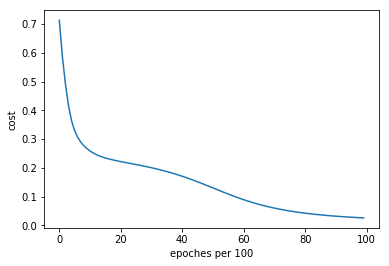

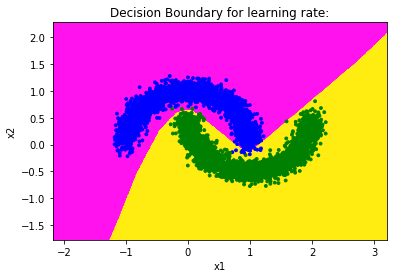

In [36]:

###Start code
parameters =deep_net(X_data,y_data, layer_dims, 0.01, 10000, regularization = False, lambd = 0, drop_out = False)
##End code
plot_decision_boundary1(X_data,y,lambda x: predict(x.T,parameters))


If you are able to train the network and visualize the decision boundary you can see that model's prediction has defined the boundary

Now build the model with regularization.  
assign **learning_rate = 0.01, num_iter = 10000 , regularization = True, lambd = 0.02**

0.8794219041043231
0.43788162670048913
0.39181192489125916
0.3662281070881097
0.34468058393190604
0.32370849418297937
0.30217127068727584
0.2804753903239495
0.2604812335814706
0.24398888376129302


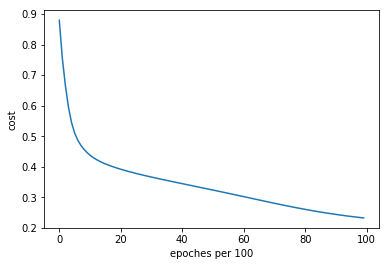

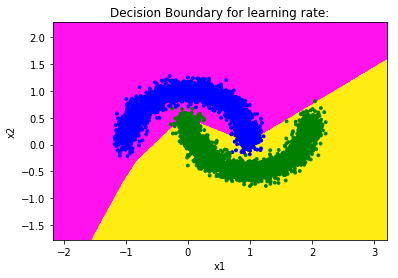

In [37]:

##Start code
parameters = deep_net(X_data,y_data, layer_dims, 0.01, 10000, regularization = True, lambd = 0.02, drop_out = False)
###end code
plot_decision_boundary1(X_data,y,lambda x: predict(x.T,parameters))


Train the model with dropout  
assign **learning_rate = 0.01, num_iter = 10000 , regularization = False, drop_out = True**

0.7242241373964035
0.3186993126732528
0.2797318050008974
0.2645346877440329
0.24072569488697826
0.21589304249700508
0.18194663104736283
0.1534404175898226
0.13684000659179188
0.11457548259993591


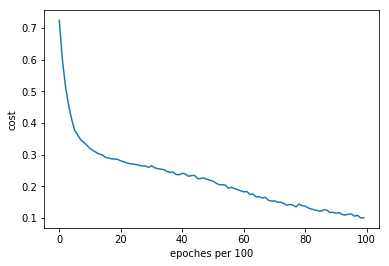

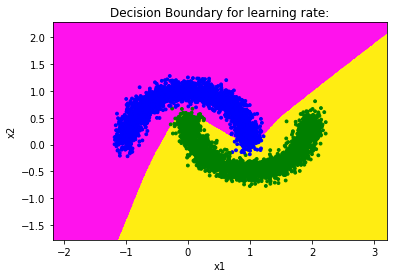

In [38]:

#Start code
parameters = deep_net(X_data,y_data, layer_dims, 0.01, 10000, regularization = False, lambd = 0, drop_out = True)
###End code
plot_decision_boundary1(X_data,y,lambda x: predict(x.T,parameters))